### Importing required packages

In [5]:
import numpy as np
import pandas as pd
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
 
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score


from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn 


from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

# import function to perform feature selection
from sklearn.feature_selection import RFE

### Loading the dataset

In [6]:
diabet = pd.read_csv('../input/diabetes/diabetic_data.csv')
diabet.head()


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO







# **Data preprocessing**

### Preprocessing the features little differently compared to the initial preprocessing, to improve the accuracy. 

### Replacing the '?' values with NAN.

In [7]:
diabet = diabet.replace("?",np.nan)

In [8]:
# Counting the number of categorical columns.
len(diabet.select_dtypes('O').columns)

37

In [9]:
# Displaying the data types of all the columns.
diabet.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

In [10]:
diabet.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [11]:
# Counting which columns have how many null values.
diabet.isnull().sum()[diabet.isnull().sum()>1]/len(diabet)*100

race                  2.233555
weight               96.858479
payer_code           39.557416
medical_specialty    49.082208
diag_1                0.020636
diag_2                0.351787
diag_3                1.398306
dtype: float64

In [12]:
# Dropping the columns which have higher numbre of missing/null values
diabet.drop(['weight','payer_code','medical_specialty'],axis=1,inplace=True)

In [13]:
 diabet['readmitted'].unique()

array(['NO', '>30', '<30'], dtype=object)

### **Readmitted**
This column our target feature. It is about **"days to inpatient readmission"**
* If the patient was readmitted in less than 30 days **"<30"**
* if the patient was readmitted in more than 30 days **">30"**
* If there is no record **"NO"**

We decided to reduce these values to two and map them according to the following rule;
* NO and "<30" -> 0 
* ">30" -> 1

In [14]:
diabet.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),6,25,1,1,41,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),1,1,7,3,59,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),1,1,7,2,11,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),1,1,7,2,44,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),1,1,7,1,51,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [15]:
diabet = diabet.replace({"NO":0,
                         "<30":1,
                         ">30":0})

print(diabet.readmitted.value_counts())

0    90409
1    11357
Name: readmitted, dtype: int64


### **Race**
We have 5 different races value, these are;
- Caucasian          
- AfricanAmerican    
- Hispanic            
- Asian
- Other 

In [16]:
print("Proportion of Race")
print(diabet.race.value_counts(normalize = True)*100)

Proportion of Race
Caucasian          76.486788
AfricanAmerican    19.307891
Hispanic            2.047380
Other               1.513674
Asian               0.644266
Name: race, dtype: float64


- As we see, there is **Caucasians** in 73 percent of all our data. And other other 22 percent is divided into **African Americans**, **Hispanics**, **Asians** and **Others**.
- Here we decided to divide into 3 groups like **Caucasian**, **African American** and **Other** as we have high number of `Caucasian` race samples, and `African American` values.

In [17]:
mapped_race = {"Asian":"Other","Hispanic":"Other"}
diabet.race = diabet.race.replace(mapped_race)

print(diabet.race.value_counts(normalize= True)*100)

Caucasian          76.486788
AfricanAmerican    19.307891
Other               4.205321
Name: race, dtype: float64


### **Gender**

In [18]:
print("Proportions of Gender Value")
print(diabet.gender.value_counts(normalize = True))

Proportions of Gender Value
Female             0.537586
Male               0.462384
Unknown/Invalid    0.000029
Name: gender, dtype: float64


- When we looked up **Gender** values, there is only one entry for **Unknown/Invalid**. So we dropped them

In [19]:
diabet = diabet.drop(diabet.loc[diabet["gender"]=="Unknown/Invalid"].index, axis=0)

In [20]:
print("Proportions of Gender Value")
print(diabet.gender.value_counts(normalize = True))

Proportions of Gender Value
Female    0.537602
Male      0.462398
Name: gender, dtype: float64


- We see a nearly equal distribution of **Gender**.
- Also, we can state that **Females** are a little more prone than **Males**.

## **Age**

* Age features has the values in the format of "[70-80)".

* To get rid of this parenthesis notation and make the **Age** variable a numeric value, we changed it according to the following rule.

In [21]:
diabet.age = diabet.age.replace({"[70-80)":75,
                         "[60-70)":65,
                         "[50-60)":55,
                         "[80-90)":85,
                         "[40-50)":45,
                         "[30-40)":35,
                         "[90-100)":95,
                         "[20-30)":25,
                         "[10-20)":15,
                         "[0-10)":5})

### **Admission Type ID**
Integer identifier corresponding to 9 distinct values;
- **Emergency**        : 1
- **Urgent**           : 2
- **Elective**         : 3
- **Newborn**          : 4
- **Not Available**    : 5
- **NULL**             : 6
- **Trauma Center**    : 7
- **Not Mapped**       : 8



In [22]:
print("Distribution of ID's")
print(diabet.admission_type_id.value_counts())

Distribution of ID's
1    53988
3    18868
2    18480
6     5291
5     4785
8      320
7       21
4       10
Name: admission_type_id, dtype: int64


In here we need to do mapping for :
- **NULL**, **Not Available** and **Not Mapped** values.
- In addition, we will map **Urgent** value as **Emergency** because they have same meaning

In [23]:
mapped = {1.0:"Emergency",
          2.0:"Emergency",
          3.0:"Elective",
          4.0:"New Born",
          5.0:np.nan,
          6.0:np.nan,
          7.0:"Trauma Center",
          8.0:np.nan}

diabet.admission_type_id = diabet.admission_type_id.replace(mapped)

print("-Distribution of ID's-")
print(diabet.admission_type_id.value_counts())

-Distribution of ID's-
Emergency        72468
Elective         18868
Trauma Center       21
New Born            10
Name: admission_type_id, dtype: int64


### **Discharge Disposition ID**
-Integer identifier corresponding to 29 distinct values. For example, discharged to home, expired, and not available

In [24]:
print("-Discharge Disposition IDs-")
print(diabet.discharge_disposition_id.value_counts())

-Discharge Disposition IDs-
1     60232
3     13954
6     12902
18     3691
2      2128
22     1992
11     1642
5      1184
25      989
4       815
7       623
23      412
13      399
14      372
28      139
8       108
15       63
24       48
9        21
17       14
16       11
19        8
10        6
27        5
12        3
20        2
Name: discharge_disposition_id, dtype: int64


When we look the above list, we can see too much values. Getting rid of that situation,
 we applied this rules: 
- If any one includes **"home"** word I will grouping into one
- If not, it will be as **OTHER**
- NAN = 18, 25, 26

In [25]:
diabet['discharge_disposition_id'].unique()

array([25,  1,  3,  6,  2,  5, 11,  7, 10,  4, 14, 18,  8, 13, 12, 16, 17,
       22, 23,  9, 20, 15, 24, 28, 19, 27])

In [26]:
mapped_discharge = {1:"Discharged to Home",
                    6:"Discharged to Home",
                    8:"Discharged to Home",
                    13:"Discharged to Home",
                    19:"Discharged to Home",
                    18:np.nan,25:np.nan,26:np.nan,
                    2:"Other",3:"Other",4:"Other",
                    5:"Other",7:"Other",9:"Other",
                    10:"Other",11:"Other",12:"Other",
                    14:"Other",15:"Other",16:"Other",
                    17:"Other",20:"Other",21:"Other",
                    22:"Other",23:"Other",24:"Other",
                    27:"Other",28:"Other",29:"Other",30:"Other"}

diabet["discharge_disposition_id"] = diabet["discharge_disposition_id"].replace(mapped_discharge)

- Now it will be more clear and readable

In [27]:
diabet['discharge_disposition_id'].unique()

array([nan, 'Discharged to Home', 'Other'], dtype=object)

In [28]:
print("Proportions of ID's")
print(diabet.discharge_disposition_id.value_counts())

Proportions of ID's
Discharged to Home    73649
Other                 23434
Name: discharge_disposition_id, dtype: int64


### **Admission Source ID**

Integer identifier corresponding to 21 distinct values.For example, **physician referral, emergency room, and transfer from a hospital**


In [29]:
print("Proportions of Admission Source ID's")
print(diabet.admission_source_id.value_counts())

Proportions of Admission Source ID's
7     57492
1     29564
17     6781
4      3187
6      2264
2      1104
5       855
3       187
20      161
9       125
8        16
22       12
10        8
11        2
14        2
25        2
13        1
Name: admission_source_id, dtype: int64


We can see that there is same problem here. Again we applied some map like:

- we'll put the similar ones together like **Referral or Transfer**
- we will replace **Null, Not Mapped, Unknown** values as NAN


In [30]:
mapped_adm = {1:"Referral",2:"Referral",3:"Referral",
              4:"Other",5:"Other",6:"Other",10:"Other",22:"Other",25:"Other",
              9:"Other",8:"Other",14:"Other",13:"Other",11:"Other",
              15:np.nan,17:np.nan,20:np.nan,21:np.nan,
              7:"Emergency"}
diabet.admission_source_id = diabet.admission_source_id.replace(mapped_adm)

print(diabet.admission_source_id.value_counts())

Emergency    57492
Referral     30855
Other         6474
Name: admission_source_id, dtype: int64



## **Time in Hospital**
Integer number of days between admission and discharge. Shortly it is "treatment time". As this is an integer no need to change preprocess this feature.

In [31]:
print(diabet.time_in_hospital.value_counts())


3     17756
2     17224
1     14206
4     13924
5      9966
6      7539
7      5859
8      4390
9      3002
10     2342
11     1855
12     1448
13     1210
14     1042
Name: time_in_hospital, dtype: int64


### **Number of Lab Procedures**
Number of lab tests performed during the encounter

In [32]:
print("Proportions of Column")
print(diabet.num_lab_procedures.value_counts().head(10))

Proportions of Column
1     3208
43    2804
44    2496
45    2376
38    2212
40    2201
46    2189
41    2117
42    2113
47    2106
Name: num_lab_procedures, dtype: int64


### **Diag1, Diag2 and Diag3**
- In diag section there are lots of ID that belong the specific name. So we'll map them

In [33]:
print(diabet.diag_1.value_counts())

428    6862
414    6580
786    4016
410    3614
486    3508
       ... 
839       1
691       1
605       1
698       1
827       1
Name: diag_1, Length: 716, dtype: int64


In [34]:
print(diabet.diag_2.value_counts())

276     6752
428     6662
250     6071
427     5036
401     3736
        ... 
E965       1
E882       1
99         1
52         1
350        1
Name: diag_2, Length: 748, dtype: int64


In [35]:
print(diabet.diag_3.value_counts())

250     11555
401      8288
276      5175
428      4577
427      3955
        ...  
E825        1
226         1
952         1
164         1
E822        1
Name: diag_3, Length: 789, dtype: int64


In [36]:
def map_diagnosis(data, cols):
    for col in cols:
        data.loc[(data[col].str.contains("V")) | (data[col].str.contains("E")), col] = -1
        data[col] = data[col].astype(np.float16)

    for col in cols:
        data["temp_diag"] = np.nan
        data.loc[(data[col]>=390) & (data[col]<=459) | (data[col]==785), "temp_diag"] = "Circulatory"
        data.loc[(data[col]>=460) & (data[col]<=519) | (data[col]==786), "temp_diag"] = "Respiratory"
        data.loc[(data[col]>=520) & (data[col]<=579) | (data[col]==787), "temp_diag"] = "Digestive"
        data.loc[(data[col]>=250) & (data[col]<251), "temp_diag"] = "Diabetes"
        data.loc[(data[col]>=800) & (data[col]<=999), "temp_diag"] = "Injury"
        data.loc[(data[col]>=710) & (data[col]<=739), "temp_diag"] = "Muscoloskeletal"
        data.loc[(data[col]>=580) & (data[col]<=629) | (data[col] == 788), "temp_diag"] = "Genitourinary"
        data.loc[(data[col]>=140) & (data[col]<=239), "temp_diag"] = "Neoplasms"

        data["temp_diag"] = data["temp_diag"].fillna("Other")
        data[col] = data["temp_diag"]
        data = data.drop("temp_diag", axis=1)

    return data

In [37]:
diabet = map_diagnosis(diabet,["diag_1","diag_2","diag_3"])

## **Diabetes medications**

- There was too many medications that belong the diabet. And some of them has just one or two value that does not any impact the model. So we decided to drop them.
- But firstly, lets look at the medications

## **Change**
Indicates if there was a change in diabetic medications (either dosage or generic
name). Values: 
- **“change”** 
- **“no change”**

In [38]:
diabet.change.value_counts()

No    54754
Ch    47009
Name: change, dtype: int64

In [39]:
diabet.change = diabet.change.replace("Ch","Yes")



## **Glucose Serum Test Result**<br>
Indicates the range of the result or if the test was not taken.<br> 
Values: 
- “>200,” 
- “>300,”
- “normal,” 
- “none” if not measured<br>

We decided use the Glucose Serum Test Result like as follows:


In [40]:
diabet["max_glu_serum"] = diabet["max_glu_serum"].replace({">200":2,
                                                        ">300":2,
                                                        "Norm":1,
                                                        "None":0}) 

print(diabet.max_glu_serum.value_counts())

0    96417
2     2749
1     2597
Name: max_glu_serum, dtype: int64


## **A1c test result**

Indicates the range of the result or if the test was not taken. <br>
Values: 
- “>8” if the result
was greater than 8%, 
- “>7” if the result was greater than 7% but less than 8%, “normal”
- if the result was less than 7%, and “none” if not measured.

We decided use the A1c test result like as follows:

In [41]:
diabet["A1Cresult"] = diabet["A1Cresult"].replace({">7":2,
                                           ">8":2,
                                           "Norm":1,
                                           "None":0})

print(diabet.A1Cresult.value_counts())

0    84745
2    12028
1     4990
Name: A1Cresult, dtype: int64


## **Diabetes medications**
Indicates if there was any diabetic medication prescribed. Values: **“yes”** and **“no”**

In [42]:
print(diabet.diabetesMed.value_counts())

Yes    78361
No     23402
Name: diabetesMed, dtype: int64


### Dealing with null values

In [43]:
diabet.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                         2271
gender                          0
age                             0
admission_type_id           10396
discharge_disposition_id     4680
admission_source_id          6942
time_in_hospital                0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide                   0
glipizide                       0
glyburide                       0
tolbutamide   

In [44]:
 diabet['race'] = diabet['race'].fillna(diabet['race'].mode()[0])

In [45]:
diabet['admission_type_id'] = diabet['admission_type_id'].fillna(diabet['admission_type_id'].mode()[0])

In [46]:
diabet['discharge_disposition_id'] = diabet['discharge_disposition_id'].fillna(diabet['discharge_disposition_id'].mode()[0])

In [47]:
diabet['admission_source_id'] = diabet['admission_source_id'].fillna(diabet['admission_source_id'].mode()[0])

In [48]:
diabet.head()

,encounter_id,patient_nbr,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,5,Emergency,Discharged to Home,Referral,1,41,...,No,No,No,No,No,No,No,No,No,0
1,149190,55629189,Caucasian,Female,15,Emergency,Discharged to Home,Emergency,3,59,...,No,Up,No,No,No,No,No,Yes,Yes,0
2,64410,86047875,AfricanAmerican,Female,25,Emergency,Discharged to Home,Emergency,2,11,...,No,No,No,No,No,No,No,No,Yes,0
3,500364,82442376,Caucasian,Male,35,Emergency,Discharged to Home,Emergency,2,44,...,No,Up,No,No,No,No,No,Yes,Yes,0
4,16680,42519267,Caucasian,Male,45,Emergency,Discharged to Home,Emergency,1,51,...,No,Steady,No,No,No,No,No,Yes,Yes,0


In [49]:
print(diabet.shape)

(101763, 47)


### Performing data agumentation


In order to increase the one-labelled samples by 2x times, run the next and  cell the next-next cell twice.

In [68]:
data_ones = diabet[diabet['readmitted'] == 1]
print("data ones = ", data_ones.shape)

cat_data_ones = data_ones.select_dtypes('O')
num_data_ones = data_ones.select_dtypes(np.number)
num_data_ones_x = num_data_ones.drop(columns=['readmitted'])
num_data_ones_y = num_data_ones['readmitted']

augmented_categorical_features = cat_data_ones.apply(np.random.permutation, axis=0)

# Assuming 'numerical_features' is a DataFrame containing numerical features
noise = np.random.normal(0, 0.1, num_data_ones_x.shape)
augmented_numerical_features = num_data_ones_x + noise
augmented_numerical_features = pd.concat([augmented_numerical_features, num_data_ones_y], axis=1)


augmented_data = pd.concat([augmented_categorical_features, augmented_numerical_features], axis=1)
print("augmented_data = ", augmented_data.shape)

data ones =  (22714, 47)
augmented_data =  (22714, 47)


In [69]:
diabet = pd.concat([augmented_data, diabet], axis = 0)
print("diabet = ", diabet.shape)

diabet =  (135834, 47)


In [70]:
print(diabet.shape)

(135834, 47)


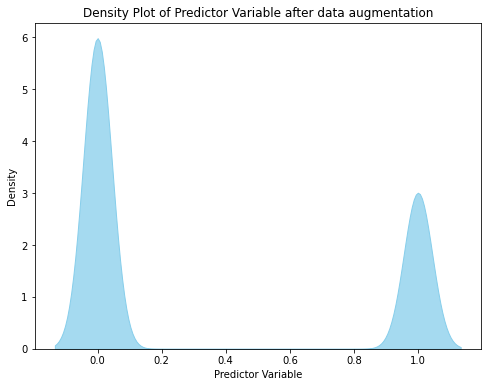

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

# Creating the density plot (KDE plot)
plt.figure(figsize=(8, 6))
sns.kdeplot(diabet['readmitted'], fill=True, color='skyblue', alpha=0.75)
plt.xlabel('Predictor Variable')
plt.ylabel('Density')
plt.title('Density Plot of Predictor Variable after data augmentation')
plt.show()

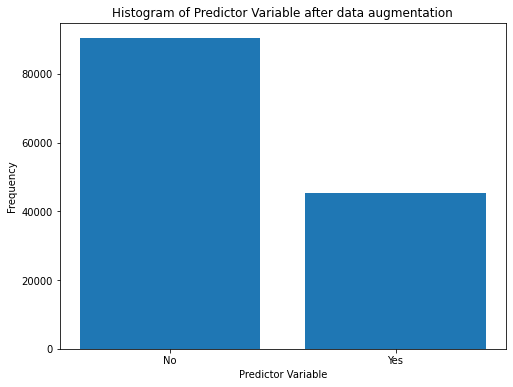

In [72]:
# Creating the histogram
plt.figure(figsize=(8, 6))
value_counts = diabet['readmitted'].value_counts()
plt.bar(x =['No','Yes'],height = value_counts.values)
plt.xlabel('Predictor Variable')
plt.ylabel('Frequency')
plt.title('Histogram of Predictor Variable after data augmentation')
plt.show()

### Preprocessing the categorical values by applying `LabelEncoding`

In [73]:
cat_data = diabet.select_dtypes('O')
num_data = diabet.select_dtypes(np.number)

In [74]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for i in cat_data:
  cat_data[i] = le.fit_transform(cat_data[i])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [75]:
data = pd.concat([num_data,cat_data],axis=1)
data.head()
data['glipizide'].unique()

array([2, 1, 0, 3])

In [76]:
data.drop(['encounter_id','patient_nbr'],axis=1,inplace=True)

In [77]:
data.head()

,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses,max_glu_serum,...,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
11,65.070799,6.983313,62.007606,0.035618,10.884484,-0.449852,0.145238,-0.121230,6.957649,0.086282,...,0,0,2,1,0,0,0,0,0,1
12,44.936732,7.020853,60.121046,0.238499,15.090920,0.337440,1.207832,0.070510,8.264964,-0.219709,...,0,0,1,1,0,0,0,0,0,1
16,54.707444,3.960394,45.204276,3.983971,17.077924,0.010061,-0.035165,0.025717,8.138764,-0.150309,...,0,0,0,1,0,0,0,0,0,1
46,75.149428,9.239256,25.125279,2.902159,15.928679,-0.177075,-0.127092,2.091457,6.678291,0.064400,...,0,0,1,1,0,0,0,0,1,1
50,55.142266,4.102750,39.626394,1.016330,13.804868,0.162559,0.067054,0.093172,9.096628,0.128820,...,0,0,1,1,0,0,0,0,0,1


In [78]:
print(data.shape)

(135834, 45)


### Making the data set balanced and splitting the data into train and test subsets.

In [79]:
zero_label_data = data[data['readmitted'] == 0]
one_label_data = data[data['readmitted'] == 1]

print("zero labeled data len = ", len(zero_label_data))
print("one labeled data len = ", len(one_label_data))

# Select an equal number of rows from each group
num_rows_to_select = min(len(zero_label_data), len(one_label_data))
zero_data = zero_label_data.sample(n=num_rows_to_select-5000)
one_data = one_label_data.sample(n=num_rows_to_select)

zero_data_x = zero_data[zero_data.columns[~zero_data.columns.isin(['readmitted'])]]
zero_data_y = zero_data['readmitted']

zero_train_x, zero_test_x, zero_train_y, zero_test_y = train_test_split(zero_data_x, zero_data_y, test_size=0.1,random_state=109)
print("zero_train_x = ", len(zero_train_x))
print("zero_test_x", len(zero_test_x))

one_data_x = one_data[one_data.columns[~one_data.columns.isin(['readmitted'])]]
one_data_y = one_data['readmitted']

one_train_x, one_test_x, one_train_y, one_test_y = train_test_split(one_data_x, one_data_y, test_size=0.1,random_state=109)
print("one_train_x = ", len(one_train_x))
print("one_test_x", len(one_test_x))

selected_train_x = pd.concat([zero_train_x, one_train_x])
selected_train_y = pd.concat([zero_train_y, one_train_y])
selected_test_x = pd.concat([zero_test_x, one_test_x])
selected_test_y = pd.concat([zero_test_y, one_test_y])

print("selected_train_x = ", len(selected_train_x))
print("selected_train_y", len(selected_train_y))
print("selected_test_x = ", len(selected_test_x))
print("selected_test_y", len(selected_test_y))

# Shuffling the dataset
# selected_data = selected_data.sample(frac=1).reset_index(drop=True)
selected_train_x = selected_train_x.sample(frac=1).reset_index(drop=True)
selected_train_y = selected_train_y.sample(frac=1).reset_index(drop=True)
selected_test_x = selected_test_x.sample(frac=1).reset_index(drop=True)
selected_test_y = selected_test_y.sample(frac=1).reset_index(drop=True)

zero labeled data len =  90406
one labeled data len =  45428
zero_train_x =  36385
zero_test_x 4043
one_train_x =  40885
one_test_x 4543
selected_train_x =  77270
selected_train_y 77270
selected_test_x =  8586
selected_test_y 8586


In [80]:
#modelling now
import statsmodels.api as sm

from sklearn.preprocessing import StandardScaler 

### Performing scaling to train_x and test_x data.

In [81]:
SC = StandardScaler()

X_train_scaled = pd.DataFrame(SC.fit_transform(selected_train_x),columns=selected_train_x.columns)
X_test_scaled = pd.DataFrame(SC.transform(selected_test_x),columns=selected_test_x.columns)

In [82]:
X_train_scaled.shape,X_test_scaled.shape,selected_train_y.shape,selected_test_y.shape

((77270, 44), (8586, 44), (77270,), (8586,))

In [83]:
y_train = selected_train_y
y_test = selected_test_y

### Trying Neural Networks - Final Model

In [108]:
from sklearn import neural_network
nn = neural_network.MLPClassifier(hidden_layer_sizes=(100, 150, 200, 250, 300, 350 ), max_iter=300)
nn.fit(X_train_scaled, y_train)
y_pred_train = nn.predict(X_train_scaled)
#Predict the response for test dataset
y_pred_test = nn.predict(X_test_scaled)

In [109]:
# Model Accuracy: how often is the classifier correct?
from sklearn import metrics

print("Accuracy with Neural Network on train dataset :",metrics.accuracy_score(y_train, y_pred_train))
print("Accuracy with Neural Network on test dataset :",metrics.accuracy_score(y_test, y_pred_test))

Accuracy with Neural Network on train dataset : 0.9875630904620163
Accuracy with Neural Network on test dataset : 0.5089680875844398


Confusion Matrix:
[[1999 2044]
 [2172 2371]]


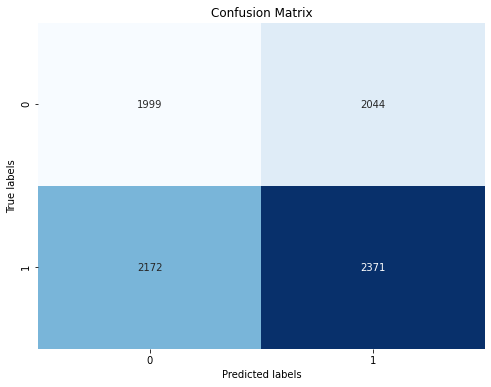

In [110]:
#Plotting the confusion matrix.
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the confusion matrix
cm_unbiased = confusion_matrix(y_test, y_pred_test)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm_unbiased)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_unbiased, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [111]:
# Calculate FP, TP, TN, and FN rates
FP = cm_unbiased[0, 1]
TP = cm_unbiased[1, 1]
TN = cm_unbiased[0, 0]
FN = cm_unbiased[1, 0]

# Print the rates
print(f"False Positives (FP): {FP}")
print(f"False Negatives (FN): {FN}")
print("-------------------")
print(f"True Positives (TP): {TP}")
print(f"True Negatives (TN): {TN}")

False Positives (FP): 2044
False Negatives (FN): 2172
-------------------
True Positives (TP): 2371
True Negatives (TN): 1999
